In [14]:
%matplotlib inline
from matplotlib import pyplot as plt, cm
from sklearn import datasets
from skimage import io
from skimage import exposure
from skimage import filters
from skimage import img_as_ubyte, morphology
from skimage.morphology import square
from skimage.color import rgb2gray
import cv2
import numpy as np

In [2]:
# MNIST Dataset Loading
dataset = datasets.fetch_mldata("MNIST Original", data_home=".")
print "column name are %s, %s" %(dataset.COL_NAMES[0], dataset.COL_NAMES[1])
print "lables are %s" %set(dataset.target.tolist())

column name are label, data
lables are set([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])


In [3]:
features = np.array(dataset.data, 'int16')
labels = np.array(dataset.target, 'int')
print "The number of sample data is %s" %labels.shape[0]

The number of sample data is 70000


In [4]:
# mnist에서 각 숫자별 샘플을 출력
sample_0 = features[0].reshape((28, 28))
sample_1 = features[10000].reshape((28, 28))
sample_2 = features[15000].reshape((28, 28))
sample_3 = features[20000].reshape((28, 28))
sample_4 = features[30000].reshape((28, 28))
sample_5 = features[35000].reshape((28, 28))
sample_6 = features[40000].reshape((28, 28))
sample_7 = features[45000].reshape((28, 28))
sample_8 = features[50000].reshape((28, 28))
sample_9 =features[55000].reshape((28, 28))

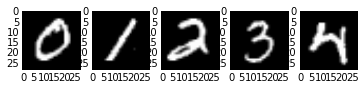

In [5]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5)
ax0.imshow(sample_0, cmap='gray')
ax1.imshow(sample_1, cmap='gray')
ax2.imshow(sample_2, cmap='gray')
ax3.imshow(sample_3, cmap='gray')
ax4.imshow(sample_4, cmap='gray')

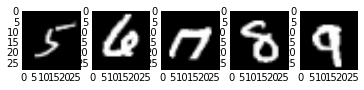

In [6]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5)
ax0.imshow(sample_5, cmap='gray')
ax1.imshow(sample_6, cmap='gray')
ax2.imshow(sample_7, cmap='gray')
ax3.imshow(sample_8, cmap='gray')
ax4.imshow(sample_9, cmap='gray')

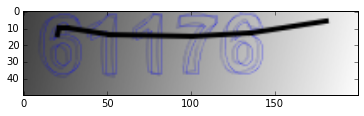

In [7]:
# label이 붙은 데이터를 출력
im = io.imread('./data_label/002d0db8ea8f65f4c06321f57ea763c7_61176.png')
plt.imshow(im, cmap='gray')

In [8]:
# image size
w, h, _ = im.shape
print "the size of image is width(%s) * height(%s)" %(w,h)

the size of image is width(50) * height(200)


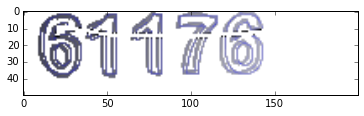

In [9]:
# 배경화면과 검정색 라인을 제거
for x in range(w):
    for j in range(h):
#         im[x][j][0] is red
#         im[x][j][1] is greed
#         im[x][j][2] is blue

        if im[x][j][0] == im[x][j][1] and im[x][j][1] == im[x][j][2] and im[x][j][2] == im[x][j][0]:
            im[x][j][0] = 255
            im[x][j][1] = 255
            im[x][j][2] = 255
plt.imshow(im, cmap='gray')

the dimension of rgb is (50, 200, 3)
the dimension of gray is (50, 200)


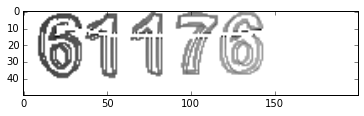

In [11]:
# rgb mode -> gray mode
im_gray = rgb2gray(im)
plt.imshow(im_gray, cmap='gray')
print "the dimension of rgb is %s" %str(im.shape)
print "the dimension of gray is %s" %str(im_gray.shape)

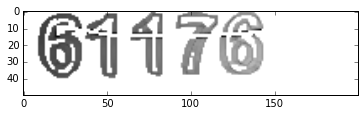

In [13]:
# opening를 이용
im_gray = img_as_ubyte(im_gray)
im_gray = morphology.opening(im_gray, square(2))
plt.imshow(im_gray, cmap='gray')

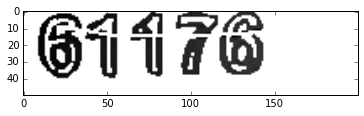

In [15]:
# equalize_hist를 이용
im_gray_equalize = exposure.equalize_hist(im_gray)
plt.imshow(im_gray_equalize, cmap='gray')

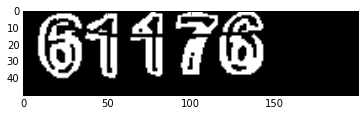

In [16]:
# threshold_otsu를 이용
threshold = filters.threshold_otsu(im_gray_equalize).copy()
threshold = im_gray_equalize < threshold
threshold = img_as_ubyte(threshold)
plt.imshow(threshold, cmap='gray')

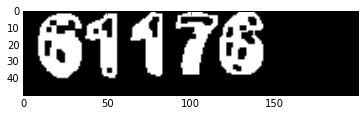

In [17]:
# closing를 이용
bw = morphology.closing(im_gray_equalize < threshold, square(3))
cleared = bw.copy()
plt.imshow(cleared, cmap='gray')

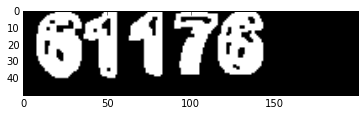

In [18]:
# dilation를 이용
cleared = morphology.dilation(cleared, morphology.square(2))
plt.imshow(cleared, cmap='gray')

In [19]:
# 사각형모양의 5개의 숫자를 찾고
# 좌표를 X축의 순서대로 반환
im_th = cleared
ctrs, hier = cv2.findContours(img_as_ubyte(im_th.copy()), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(ctr) for ctr in ctrs]
rects = sorted(rects, key=lambda tup: tup[0])
print "all rectangles are %s" %len(rects)
print rects

all rectangles are 5
[(8, 1, 27, 39), (36, 1, 20, 39), (63, 1, 20, 38), (90, 1, 26, 37), (116, 1, 27, 37)]


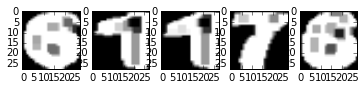

In [20]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5)
ax = [ax4, ax3, ax2, ax1, ax0]

for rect in rects:
    # Draw the rectangles
    cv2.rectangle(threshold, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 1)
    
    # Make the rectangular region around the digit
    roi = threshold[rect[1]:rect[1]+rect[3], rect[0]:rect[0]+rect[2]]
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = morphology.closing(roi, square(4))
#     roi = morphology.erosion(roi, square(3))
    
    av = ax.pop()
    av.imshow(roi, cmap='gray')

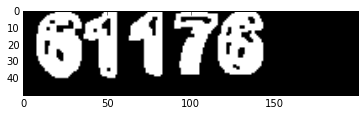

In [21]:
plt.imshow(cleared, cmap='gray')